In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("GOOG.csv")

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


In [4]:
stock_prices=pd.DataFrame(df["Close"])

In [5]:
close = df['Close'].values.reshape(-1, 1)

In [6]:
import numpy as np

def build_dataset(data, window_size=60):
    input_data, output_data = [], []
    for i in range(len(data) - window_size):
        input_data.append(data[i:i + window_size])
        output_data.append(data[i + window_size])
    return np.array(input_data), np.array(output_data)

window_size = 60  
X_data, Y_data = build_dataset(close, window_size)

train_split = int(len(X_data) * 0.98)
validate_split = int(len(X_data) * 0.99)
X_train_set, X_test_set = X_data[:train_split], X_data[train_split:validate_split]
Y_train_set, Y_test_set = Y_data[:train_split], Y_data[train_split:validate_split]
X_validate_set = X_data[validate_split:]
Y_validate_set = Y_data[validate_split:]


In [7]:
X_train_set.shape

(4702, 60, 1)

In [8]:
X_test_set.shape

(48, 60, 1)

In [9]:
X_validate_set.shape

(48, 60, 1)

In [10]:
Y_validate_set.shape

(48, 1)

In [11]:
Y_train_set.shape

(4702, 1)

In [12]:
Y_test_set.shape

(48, 1)

In [13]:
X_train_set.reshape(-1, 1).shape

(282120, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train_set.shape[1], 1))))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()

C:\Users\tunah\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(X_train_set, Y_train_set, validation_data=(X_validate_set,Y_validate_set) ,epochs=75)

Epoch 1/75
147/147 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - loss: 2357.1233 - mae: 33.0114 - val_loss: 9391.6641 - val_mae: 96.7928
Epoch 2/75
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 819.8133 - mae: 15.2341 - val_loss: 2802.4006 - val_mae: 52.7218
Epoch 3/75
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 237.3140 - mae: 8.3807 - val_loss: 760.6245 - val_mae: 27.1628
Epoch 4/75
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 140.3959 - mae: 6.9333 - val_loss: 393.2163 - val_mae: 19.2492
Epoch 5/75
147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 132.5943 - mae: 6.6454 - val_loss: 141.6424 - val_mae: 10.9517
Epoch 6/75
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 121.6864 - mae: 6.6122 - val_loss: 397.1709 - val_mae: 19.3547
Epoch 7/75
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 117.6262 - mae: 6.3910 - val_loss: 287.3045 - val_mae: 16.3353
Epoch 8/75
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 116.5353 - mae: 6.3488 - val_loss: 54.9076 - val_mae: 6.9376


In [16]:
model.evaluate(X_validate_set,Y_validate_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 26.9570 - mae: 4.7163


[26.093786239624023, 4.613900661468506]

In [17]:
y_pred_train=model.predict(X_train_set)
y_pred_test=model.predict(X_test_set)

147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


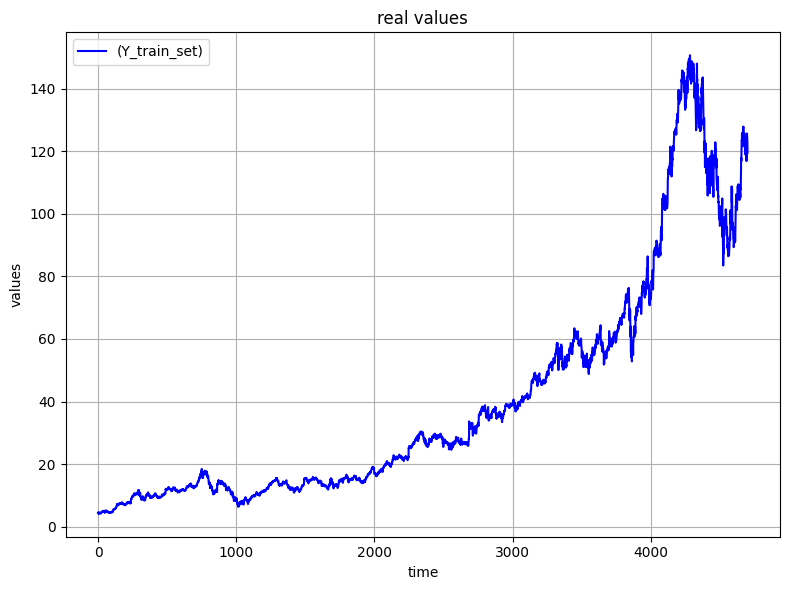

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.plot(Y_train_set, label='(Y_train_set)', color='blue', linestyle='-')
plt.title('real values')
plt.xlabel('time')
plt.ylabel('values')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

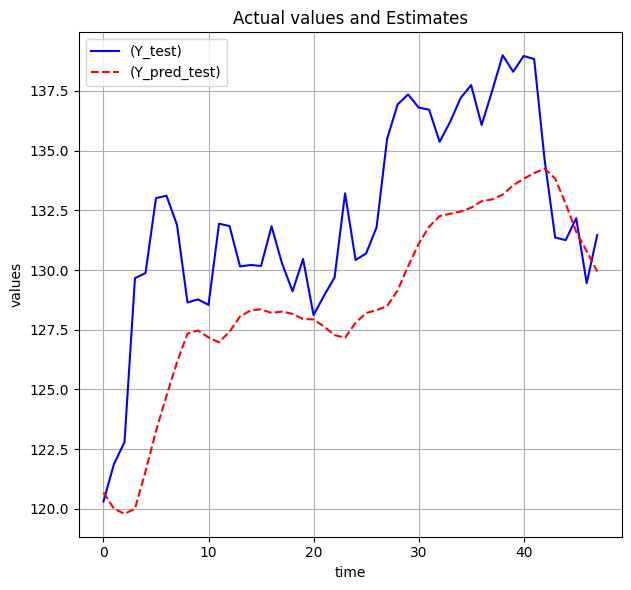

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(Y_test_set, label='(Y_test)', color='blue', linestyle='-')
plt.plot(y_pred_test, label='(Y_pred_test)', color='red', linestyle='--')
plt.title('Actual values ​​and Estimates')
plt.xlabel('time')
plt.ylabel('values')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()